# CENSUS INCOME PROJECT
### Problem Statement:
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)).

Description of fnlwgt (final weight) The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

### Prediction :
The prediction task is to determine whether a person makes over $50K a year or not .



## Data Exploring

In [82]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
import joblib as jl
from joblib import dump,load
import warnings
warnings.filterwarnings("ignore")

In [83]:
df=pd.read_csv(r"C:\Users\hp\Dropbox\PC\Desktop\Evaluation Projects\week 2\Census Income Project\census_income.csv")
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [84]:
# First lets check the shape of our data set
df.shape

(32560, 15)

In [85]:
# Now that it is clear or data consist of 14 featurs and 1 target/label 
#let check its data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


From above information we get the clear idea of "data type" of diffrent columns.

Above information also give us little insight about the null value,But lets confirm if our dataset contain null values or not.

In [86]:
# checking for null values
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [87]:
# This clears that there is no null values present in our dataset.
# Now lets check the unique value each column contains.
for i in df.columns:
    print(i,':',len(df[i].unique()))

Age : 73
Workclass : 9
Fnlwgt : 21647
Education : 16
Education_num : 16
Marital_status : 7
Occupation : 15
Relationship : 6
Race : 5
Sex : 2
Capital_gain : 119
Capital_loss : 92
Hours_per_week : 94
Native_country : 42
Income : 2


In [88]:
# above code give us information about unique value each  column contains.
# now lets check value counts of each column to understand data further.
df.value_counts('Age')

Age
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
86      1
87      1
Length: 73, dtype: int64

In [89]:
df.value_counts('Workclass')

Workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
dtype: int64

In [90]:
df.value_counts('Fnlwgt')

Fnlwgt
164190     13
123011     13
203488     13
113364     12
148995     12
           ..
158776      1
158784      1
158800      1
158810      1
1484705     1
Length: 21647, dtype: int64

In [91]:
df.value_counts('Education')

Education
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
dtype: int64

In [92]:
df.value_counts('Education_num')

Education_num
9     10501
10     7291
13     5354
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
dtype: int64

In [93]:
df.value_counts('Marital_status')

Marital_status
 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
dtype: int64

In [94]:
df.value_counts('Occupation')

Occupation
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
dtype: int64

In [95]:
df.value_counts('Relationship')

Relationship
 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
dtype: int64

In [96]:
df.value_counts('Race')

Race
 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
dtype: int64

In [97]:
df.value_counts('Sex')

Sex
 Male      21789
 Female    10771
dtype: int64

In [98]:
df.value_counts('Capital_gain')

Capital_gain
0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1455         1
4931         1
2538         1
1639         1
6097         1
Length: 119, dtype: int64

In [99]:
df.value_counts('Hours_per_week')

Hours_per_week
40    15216
50     2819
45     1824
60     1475
35     1297
      ...  
92        1
94        1
87        1
82        1
74        1
Length: 94, dtype: int64

In [100]:
df.value_counts('Native_country')

Native_country
 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                  

In [101]:
df.value_counts('Income')

Income
 <=50K    24719
 >50K      7841
dtype: int64

##### Here after exploring data we get the clear idea about our feature and label


age: continuous.

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

fnlwgt: final weight, continuous.

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 
10th, Doctorate, 5th-6th, Preschool.

education-num: continuous.

marital-status: Represents the responding unit’s role in the family. Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Represents the responding unit’s role in the family. Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male

capital-gain: income from investment sources, apart from wages/salary, continuous.

capital-loss: losses from investment sources, apart from wages/salary, continuous.

hours-per-week: continuous.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, etc

## Exploratory Data Analysis with Data Visualization

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Fnlwgt'}>],
       [<AxesSubplot:title={'center':'Education_num'}>,
        <AxesSubplot:title={'center':'Capital_gain'}>],
       [<AxesSubplot:title={'center':'Capital_loss'}>,
        <AxesSubplot:title={'center':'Hours_per_week'}>]], dtype=object)

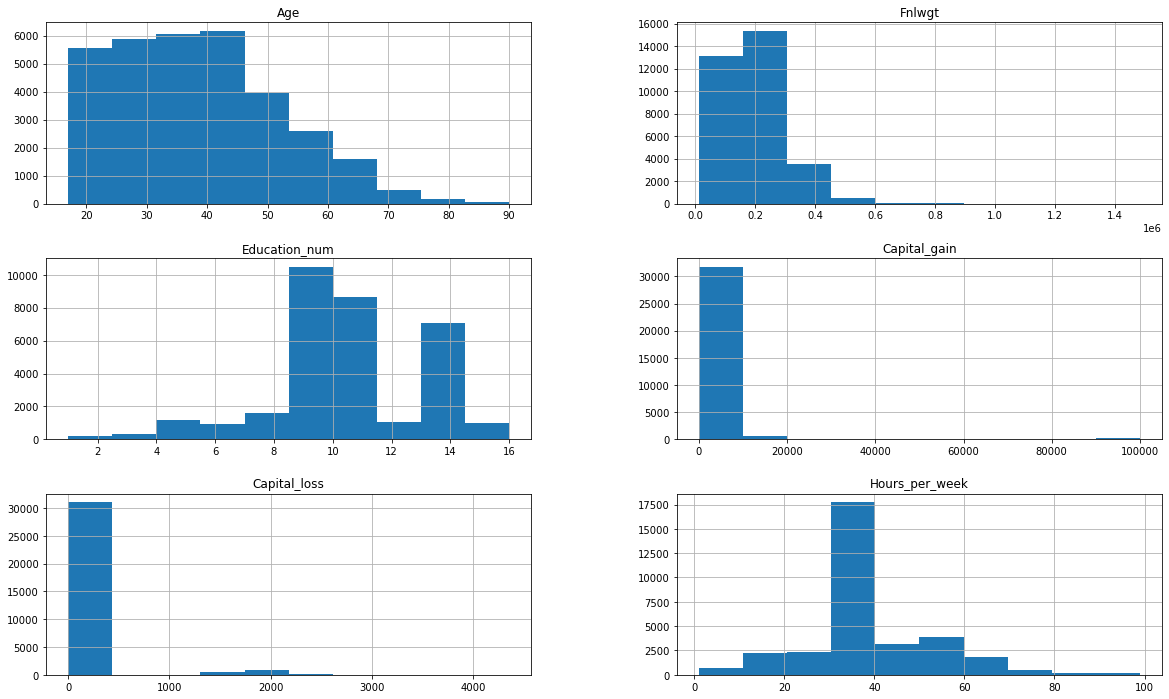

In [102]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 20, 12
df[['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']].hist()

In [103]:
#### Feature engineering
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()
df['Income'] = labelEncoder.fit_transform(df['Income'])

From above graph :

1) I can group the Age column into bins.

2) For Capital Gain and Capital Loss the data is highly left skewed which needs to be tackled.

3) We need to analyse Education Number further as it might align with Education information.

4) Final Weight is also left skewed.

5) The Hours per Week can also be split into bins.


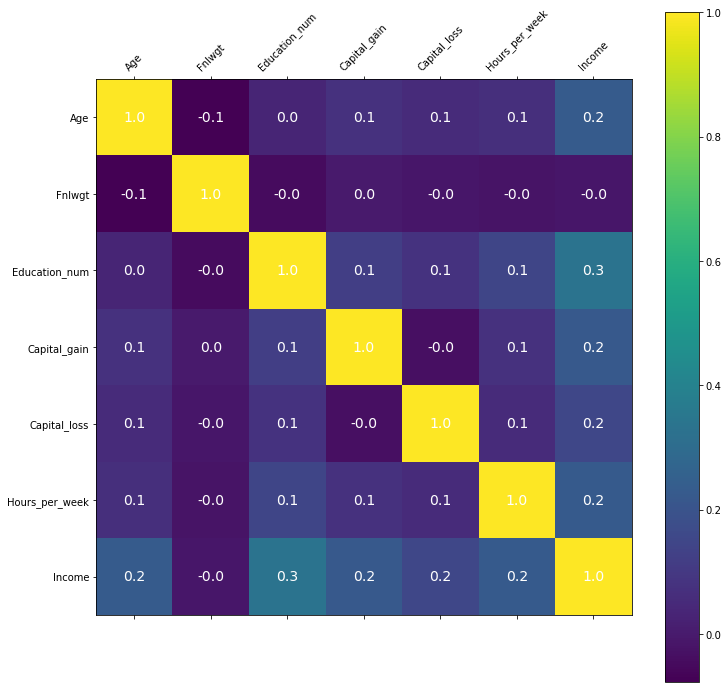

In [104]:
plt.matshow(df.corr())
plt.colorbar()
plt.xticks(np.arange(len(df.corr().columns)), df.corr().columns.values, rotation = 45) 
plt.yticks(np.arange(len(df.corr().columns)), df.corr().columns.values) 
for (i, j), corr in np.ndenumerate(df.corr()):
    plt.text(j, i, '{:0.1f}'.format(corr), ha='center', va='center', color='white', fontsize=14)

Taking a look at the correlation matrix above, it's clear that there is not a very high linear correlation between any of the continuous features and the target variable. Also, Final Weight has zero correlation with the output class and hence, I'll drop this column later.

I'll now analyse the categorical features using CountPlot.

### Age
Here, I'll bucket the age into separate bins.

1) 0-25: Young
2) 25-50: Adult
3) 50-100: Old

<AxesSubplot:xlabel='Age', ylabel='count'>

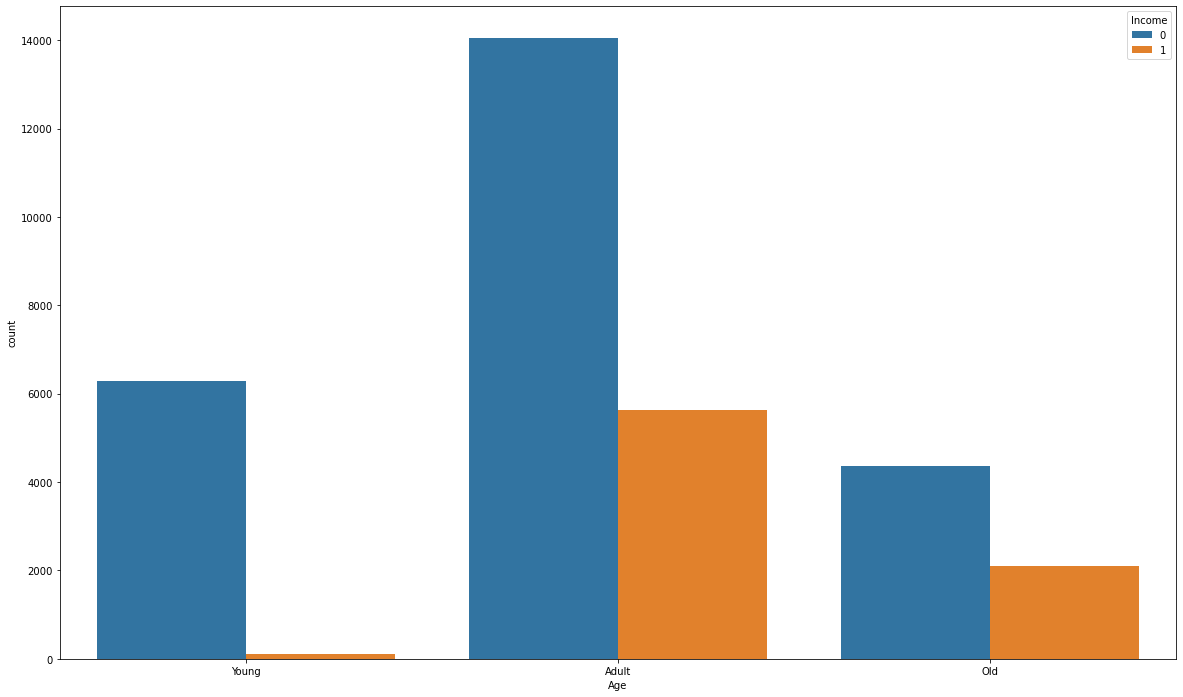

In [105]:
df['Age'] = pd.cut(df['Age'], bins = [0, 25, 50, 100], labels = ['Young', 'Adult', 'Old'])            
sns.countplot(x = 'Age', hue = 'Income', data = df)

It appears that there are relatively less Young people who have an income more than $50K.

### Capital Gain and Capital Loss
Rather than having both Capital Gain and Capital Loss, we can use their difference as that is more relevant and gives the change.

<AxesSubplot:xlabel='Capital Diff', ylabel='count'>

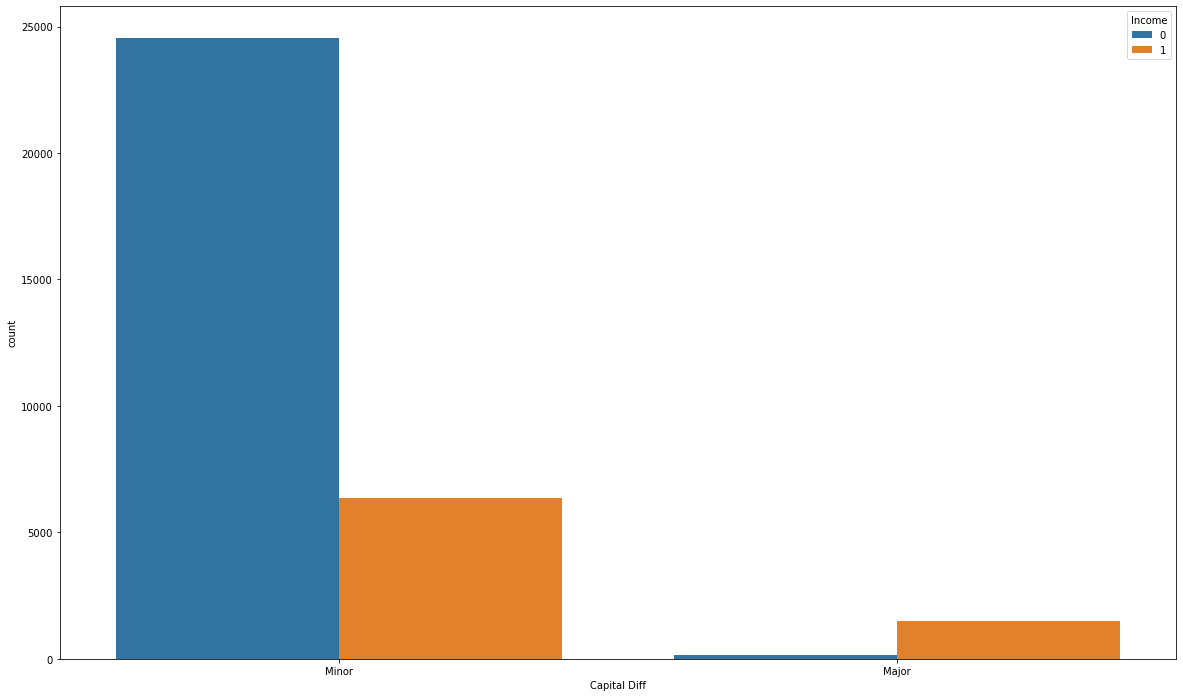

In [106]:
df['Capital Diff'] = df['Capital_gain'] - df['Capital_loss']
df.drop(['Capital_gain'], axis = 1, inplace = True)
df.drop(['Capital_loss'], axis = 1, inplace = True)
df['Capital Diff'] = pd.cut(df['Capital Diff'], bins = [-5000, 5000, 100000], labels = ['Minor', 'Major'])
sns.countplot(x = 'Capital Diff', hue = 'Income', data = df)

On taking a look at the result, I can see that the for minor there are more people with Income less than( $50k )

and  for major there are more people with Income greater than( $50K). 

This is in complete agreement with the fact that people who have large Capital Gain compared to Capital Loss have Income more than( $50K).

### Final Weight
As seen above, there is no correlation between Income and Final Weight, so I will drop this column.

In [107]:
df.drop(['Fnlwgt'], axis = 1, inplace = True)

### Hours per Week
Taking a look at the histogram for Hours per Week, I can see that the dataset is aligned around the center. I can still create buckets from this data. As usually, the work hours are close to 30-40 hours, I create the buckets as 0-30, 30-40, and 40-100.

<AxesSubplot:xlabel='Hours_per_week', ylabel='count'>

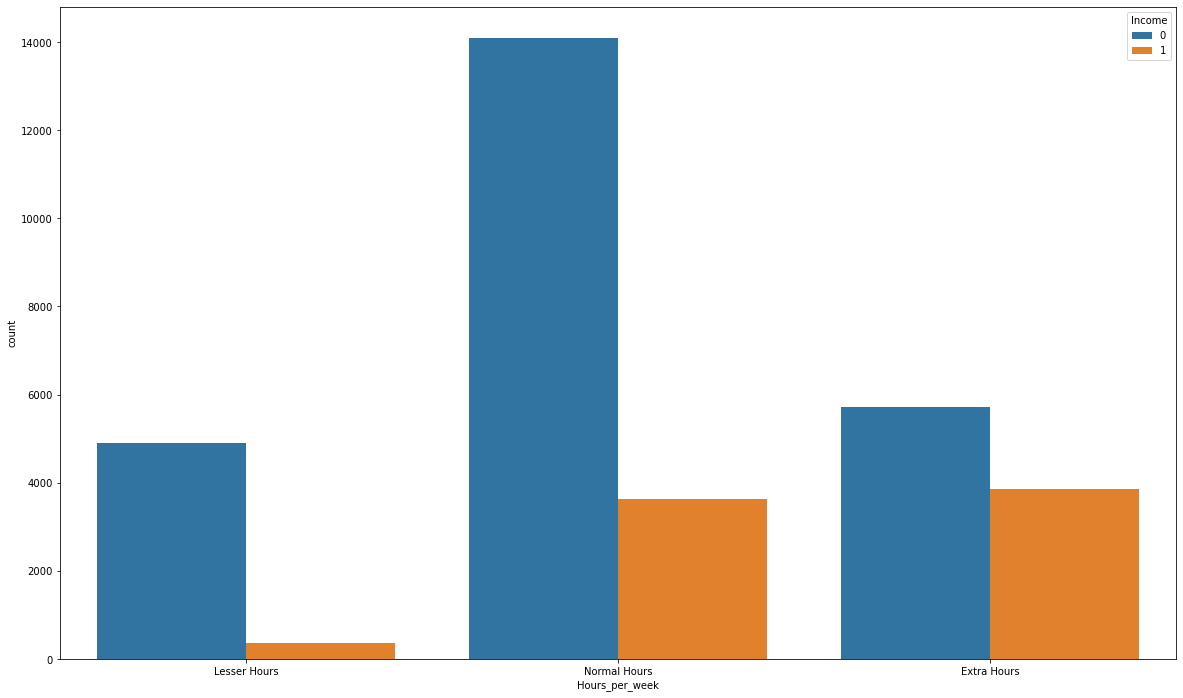

In [108]:
df['Hours_per_week'] = pd.cut(df['Hours_per_week'], 
                                   bins = [0, 30, 40, 100], 
                                   labels = ['Lesser Hours', 'Normal Hours', 'Extra Hours'])
sns.countplot(x = 'Hours_per_week', hue = 'Income', data = df)

Taking a look at the plot above, we can see a trend. As the number of hours increase, the number of people earning more than $50K increases in comparison to the people earning less.

### Work Class

<AxesSubplot:xlabel='Workclass', ylabel='count'>

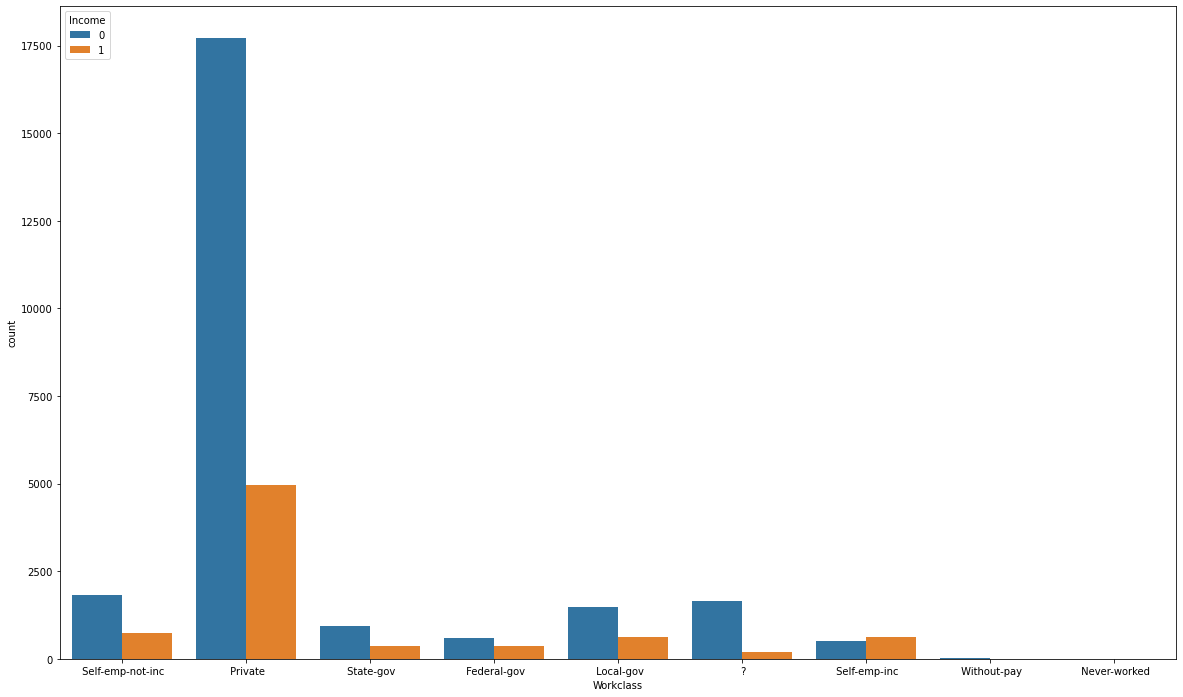

In [109]:
sns.countplot(x = 'Workclass', hue = 'Income', data = df)

Taking a look at the plot above, I can see that there are Work Class values defined as "?" which appears to be error data. As it is very less, I'll simply remove these records. Also, the two values Without-pay and Never-worked are negligible and hence it is safe to drop them too.

In [110]:
df = df.drop(df[df['Workclass'] == ' ?'].index)
df = df.drop(df[df['Workclass'] == ' Without-pay'].index)
df = df.drop(df[df['Workclass'] == ' Never-worked'].index)

### Education and Education Number
It's a good time to check if there is any relation between Education and Education Number.

<AxesSubplot:xlabel='Education', ylabel='count'>

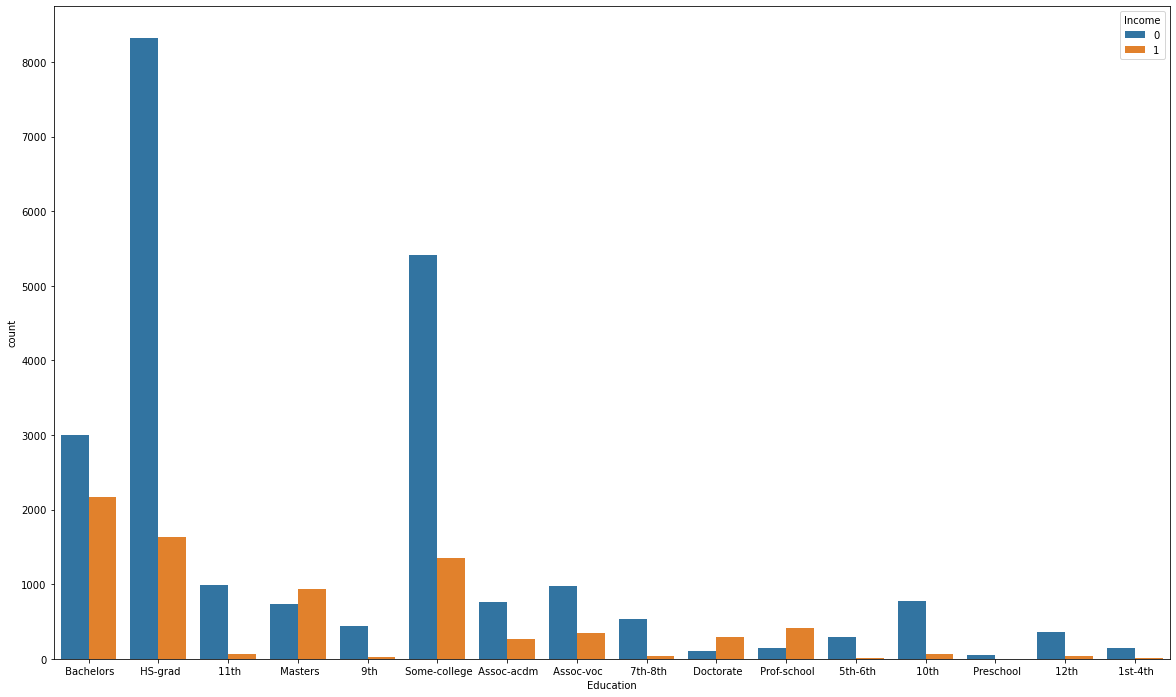

In [111]:
sns.countplot(x = 'Education', hue = 'Income', data = df)

In [112]:
education_classes = df['Education'].unique()
for edu_class in education_classes:
    print("For {}, the Education Number is {}"
          .format(edu_class, df[df['Education'] == edu_class]['Education_num'].unique()))

For  Bachelors, the Education Number is [13]
For  HS-grad, the Education Number is [9]
For  11th, the Education Number is [7]
For  Masters, the Education Number is [14]
For  9th, the Education Number is [5]
For  Some-college, the Education Number is [10]
For  Assoc-acdm, the Education Number is [12]
For  Assoc-voc, the Education Number is [11]
For  7th-8th, the Education Number is [4]
For  Doctorate, the Education Number is [16]
For  Prof-school, the Education Number is [15]
For  5th-6th, the Education Number is [3]
For  10th, the Education Number is [6]
For  Preschool, the Education Number is [1]
For  12th, the Education Number is [8]
For  1st-4th, the Education Number is [2]


From the analysis above, I discovered that Education Number and Education are just the same. So, I can drop any one column. Also, I'll combine all information from Preschool to 12th as they can be considered of one class who have no college/university level education.

In [113]:
df.drop(['Education_num'], axis = 1, inplace = True)
df['Education'].replace([' 11th', ' 9th', ' 7th-8th', ' 5th-6th', ' 10th', ' 1st-4th', ' Preschool', ' 12th'],
                             ' School', inplace = True)
df['Education'].value_counts()

 HS-grad         9959
 Some-college    6772
 Bachelors       5181
 School          3820
 Masters         1675
 Assoc-voc       1321
 Assoc-acdm      1019
 Prof-school      558
 Doctorate        398
Name: Education, dtype: int64

### Marital Status and Relationship

<AxesSubplot:xlabel='Marital_status', ylabel='count'>

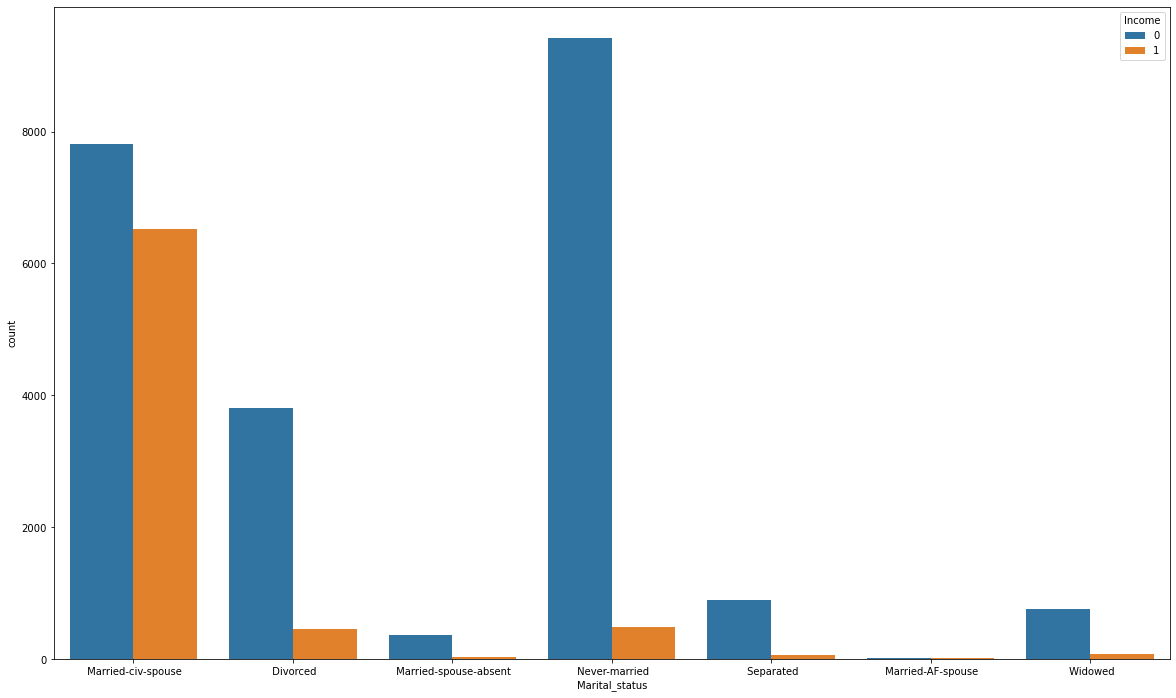

In [114]:
sns.countplot(x = 'Marital_status', hue = 'Income', data = df)

Married-civ-spouse are having more no of indivisual having income greater then 50k as compare to other category

<AxesSubplot:xlabel='Relationship', ylabel='count'>

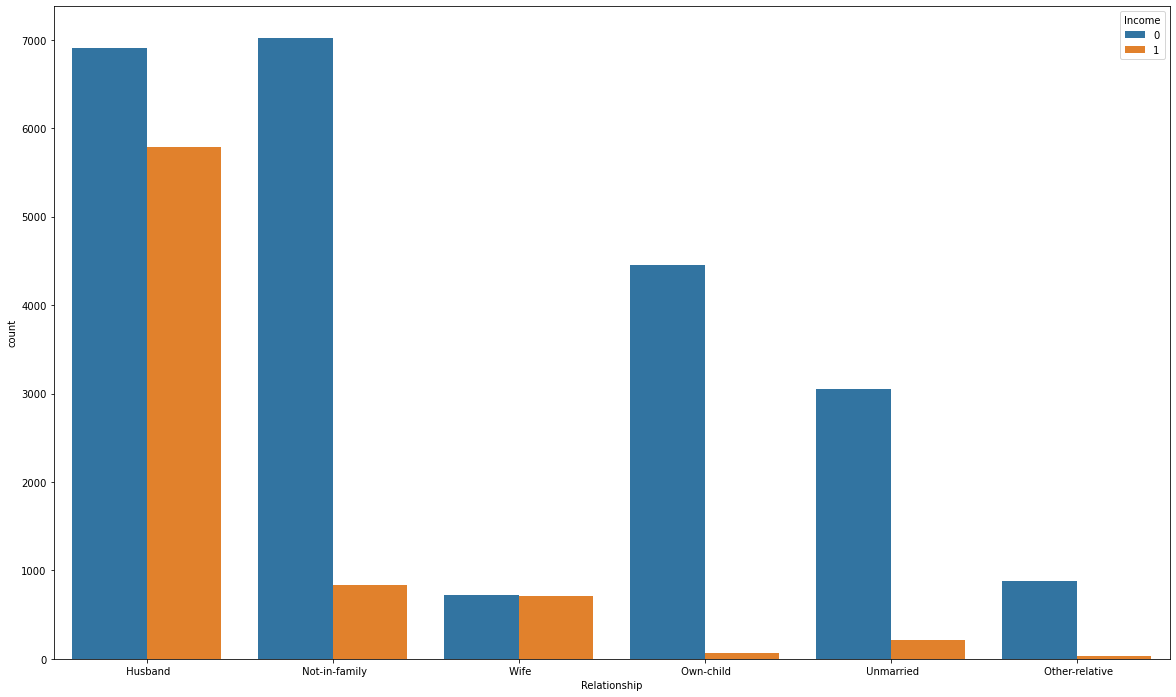

In [115]:
sns.countplot(x = 'Relationship', hue = 'Income', data = df)

Mostly Husbands category have income > 50k

Both of them have no missing values. There is some overlap between the two such as if the person is Husband or Wife, then their marital status would be Married. However, as there is no complete overlap, I'll keep both these columns.

### Occupation

<AxesSubplot:xlabel='Occupation', ylabel='count'>

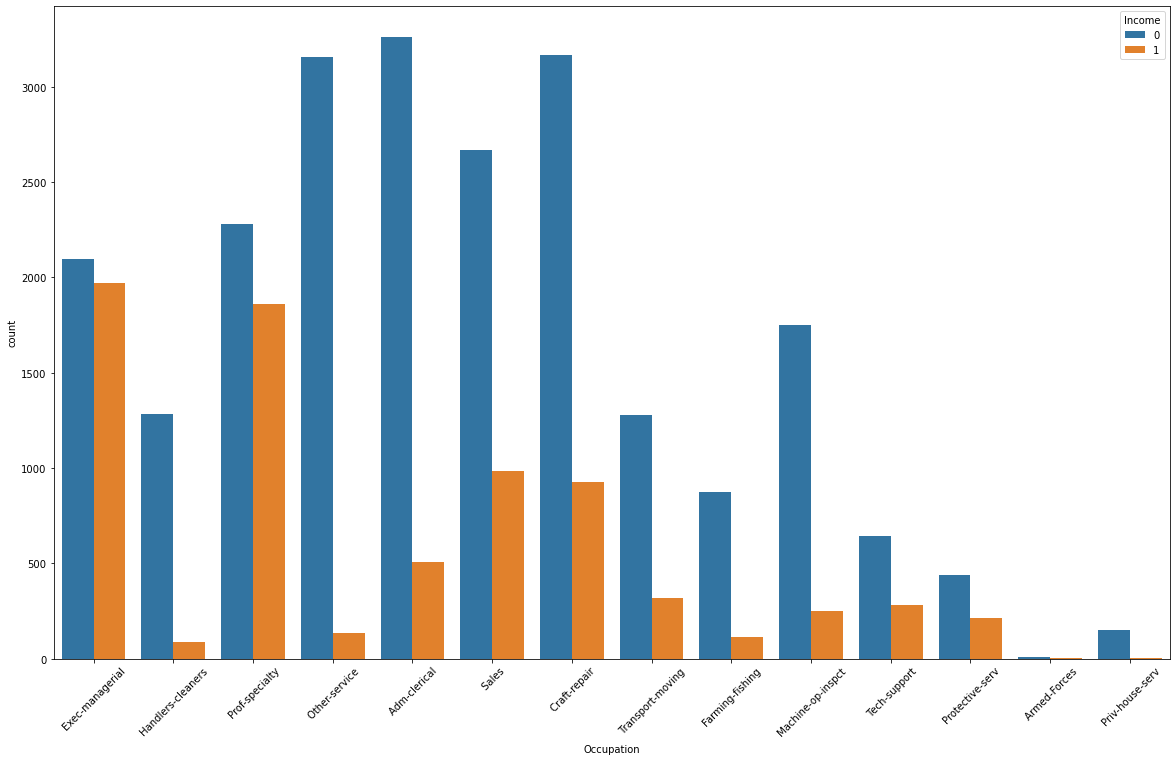

In [116]:
plt.xticks(rotation = 45)
sns.countplot(x = 'Occupation', hue = 'Income', data = df)

The data has no missing values. The categories have already been uniquely defined and we can keep it as is.

### Race

<AxesSubplot:xlabel='Race', ylabel='count'>

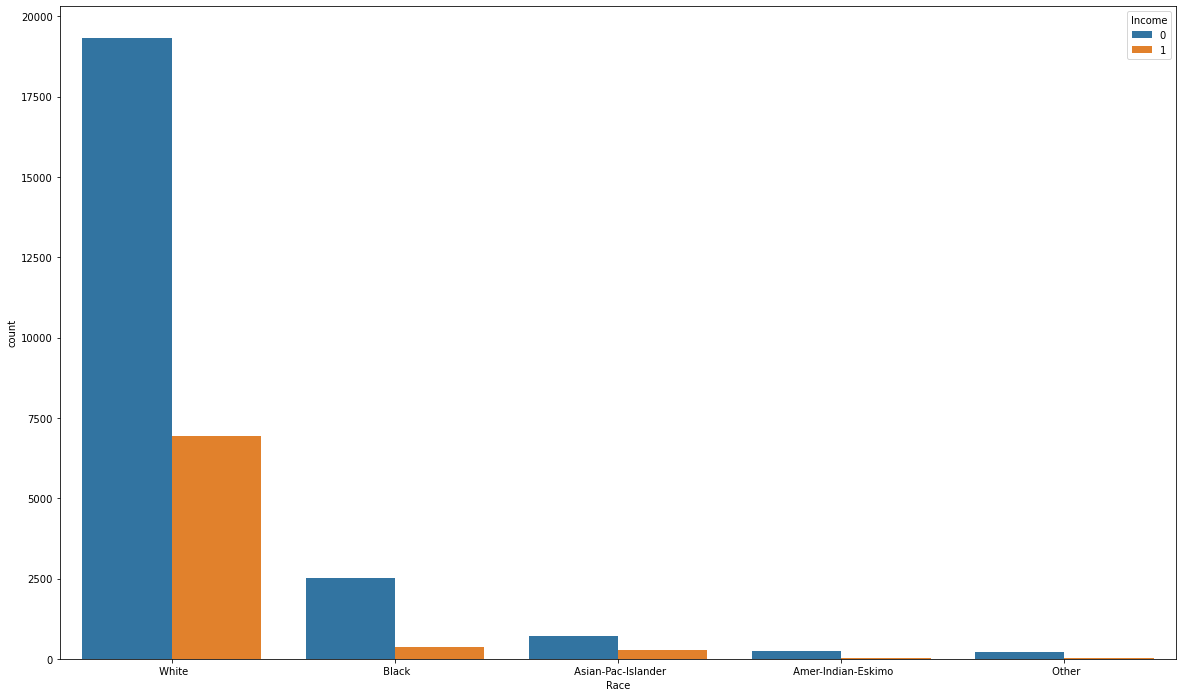

In [117]:
sns.countplot(x = 'Race', hue = 'Income', data = df)

In [118]:
#The dataset includes majority of information about White race while all other races are lesser in number. 
# I'll combine all other race data into one class as Other.

df['Race'].unique()
df['Race'].replace([' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo', ' Other'],' Other', inplace = True)

### Sex

<AxesSubplot:xlabel='Sex', ylabel='count'>

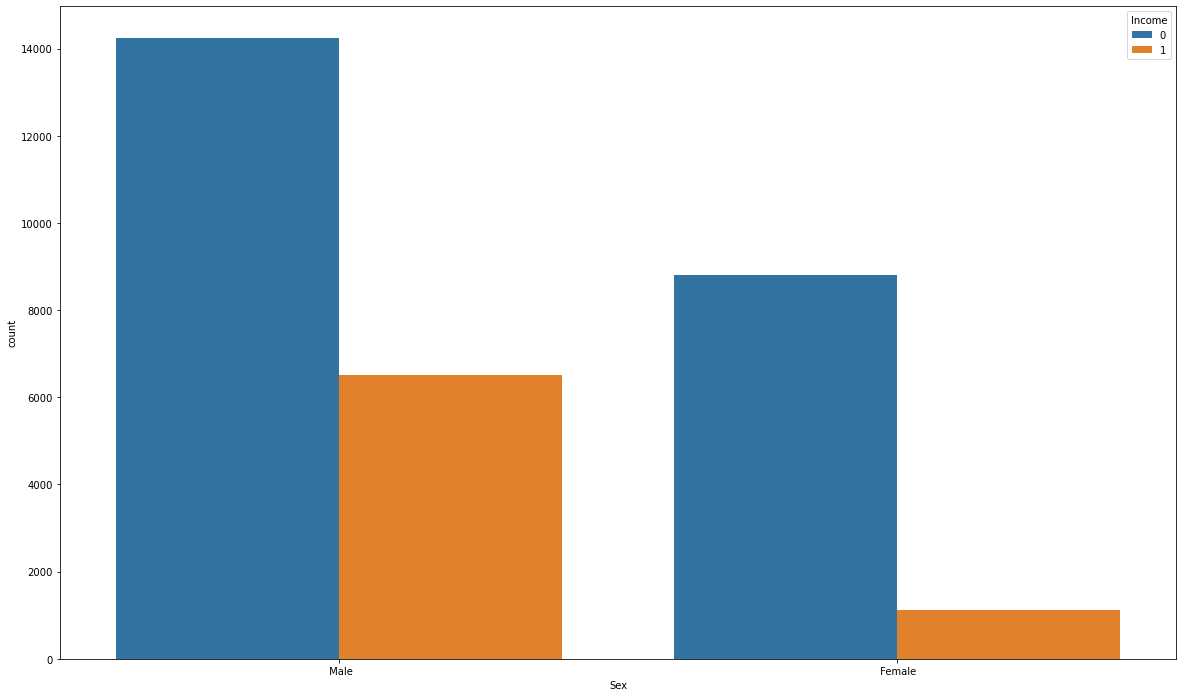

In [120]:
sns.countplot(x = 'Sex', hue = 'Income', data = df)

#### From the plot above, it is clear that

a. There are more Male participants than Female participants

b. When we compare the two genders and the corresponding income distribution, more percentage of Males have an Income of more than $50K than Females.

### Native_country

Text(0.5, 1.0, 'Total adults from each Country')

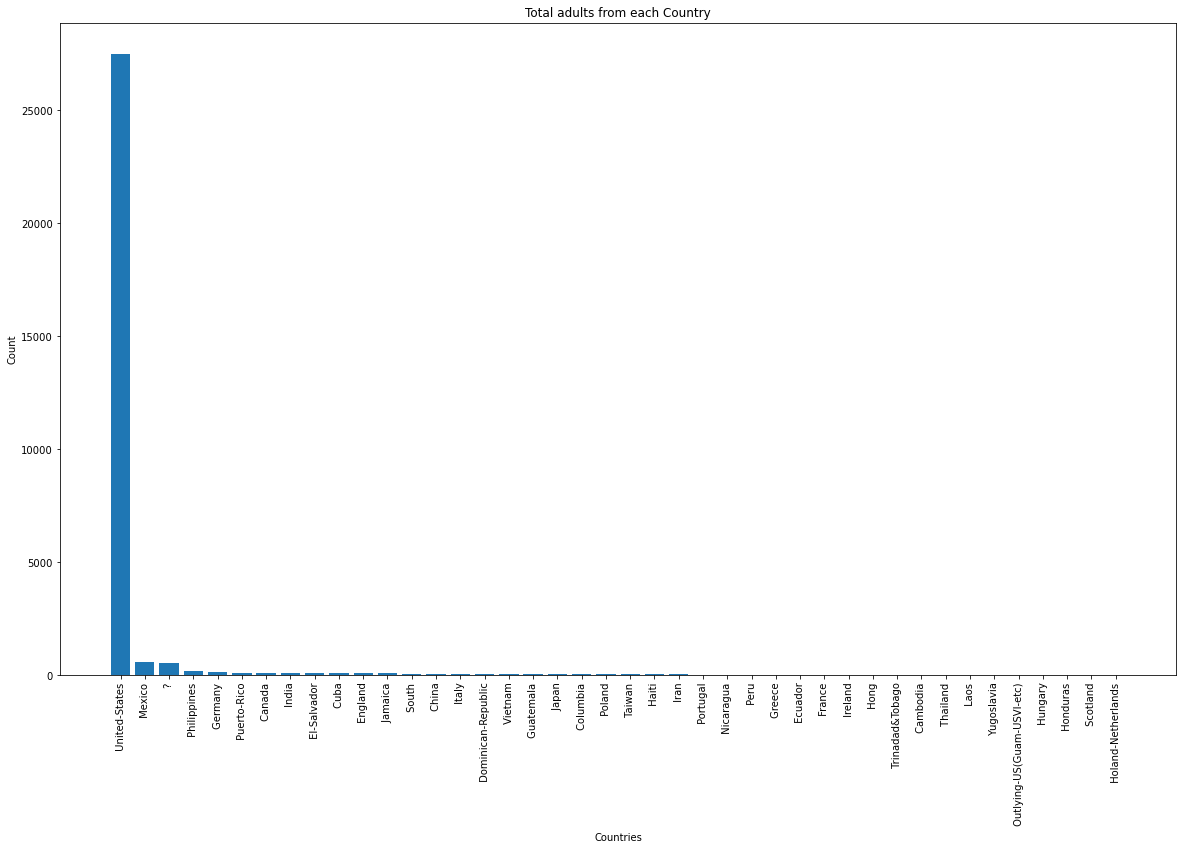

In [121]:
country_count = df['Native_country'].value_counts()
plt.bar(country_count.index, country_count.values)
plt.xticks(rotation = 90)
plt.xlabel('Countries')
plt.ylabel('Count')
plt.title('Total adults from each Country')

#### There are two things that I noticed:

a. There are some missing values in Country column denoted by ?. As they are very less, I'll drop these rows.

b. The majority of adults are from United States. Thus, we can distribute the column with values as either United States or Other.

<AxesSubplot:xlabel='count', ylabel='Native_country'>

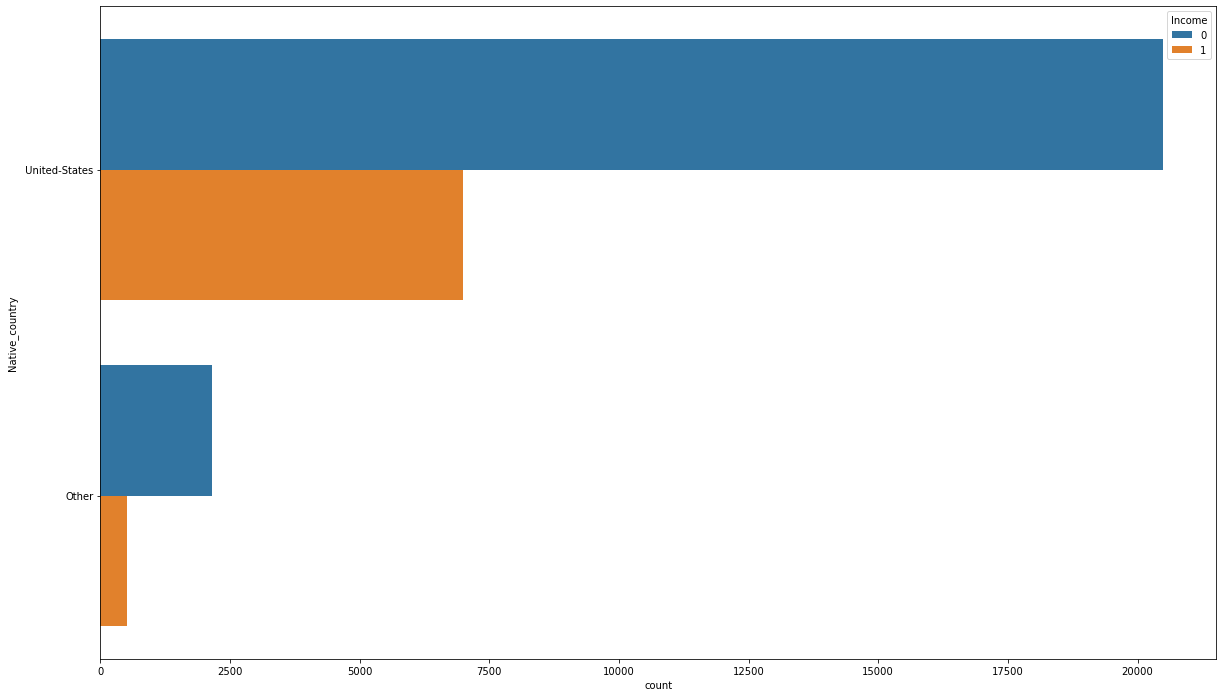

In [122]:
df = df.drop(df[df['Native_country'] == ' ?'].index)
countries = np.array(df['Native_country'].unique())
countries = np.delete(countries, 0)
df['Native_country'].replace(countries, 'Other', inplace = True)
sns.countplot(y = 'Native_country', hue = 'Income', data = df)

The data now appears much better.

I've analysed all columns. I'll simply convert categorical columns to numerical.

In [123]:
df.head()

,Age,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income,Capital Diff
0,Adult,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,Lesser Hours,United-States,0,Minor
1,Adult,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,Normal Hours,United-States,0,Minor
2,Old,Private,School,Married-civ-spouse,Handlers-cleaners,Husband,Other,Male,Normal Hours,United-States,0,Minor
3,Adult,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Other,Female,Normal Hours,Other,0,Minor
4,Adult,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,Normal Hours,United-States,0,Minor


### Feature Engineering

In [124]:
#Encoding object data into integer

label_col = ['Age','Workclass','Marital_status','Education','Occupation','Relationship','Race','Sex','Hours_per_week','Native_country','Capital Diff']
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df[label_col]=df[label_col].apply(lambda x : label.fit_transform(x))

In [125]:
df.head()

,Age,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income,Capital Diff
0,0,4,2,2,3,0,1,1,1,0,0,1
1,0,2,4,0,5,1,1,1,2,0,0,1
2,1,2,7,2,5,0,0,1,2,0,0,1
3,0,2,2,2,9,5,0,0,2,1,0,1
4,0,2,5,2,3,5,1,0,2,0,0,1


## Model Building

In [127]:
# spliting feature and label
X = df.drop(columns=['Income'])
y = df['Income']
# since data is balance already so no standardization require

In [129]:
#Splitting Data into training and testing

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=40)

In [130]:
# Importing necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,accuracy_score,f1_score,PrecisionRecallDisplay,plot_confusion_matrix,precision_score,recall_score

#### MODEL TRAINING AND FINDING BEST MODEL

## LogisticRegression

In [131]:
rslt=[]

lr = LogisticRegression(C=10, fit_intercept=True, max_iter=1000)
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
acc = accuracy_score(y_test,y_pred)

print('TRAINING SCORE : ', lr.score(x_train,y_train))
print('TESTING SCORE : ', lr.score(x_test,y_test))
print('ACCURACY :' , acc)
print('*****************************')
print(classification_report(y_test,y_pred))
rslt.append(acc)


TRAINING SCORE :  0.7952326793668847
TESTING SCORE :  0.7993366500829188
ACCURACY : 0.7993366500829188
*****************************
              precision    recall  f1-score   support

           0       0.81      0.96      0.88      6829
           1       0.73      0.29      0.42      2216

    accuracy                           0.80      9045
   macro avg       0.77      0.63      0.65      9045
weighted avg       0.79      0.80      0.77      9045



## RandomForestClassifier

In [132]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

y_pred = rfc.predict(x_test)
acc = accuracy_score(y_test,y_pred)

print('TRAINING SCORE : ', rfc.score(x_train,y_train))
print('TESTING SCORE : ', rfc.score(x_test,y_test))
print('ACCURACY :' , acc)
print('*****************************')
print(classification_report(y_test,y_pred))
rslt.append(acc)

TRAINING SCORE :  0.8959814235617477
TESTING SCORE :  0.8369264787175235
ACCURACY : 0.8369264787175235
*****************************
              precision    recall  f1-score   support

           0       0.88      0.91      0.89      6829
           1       0.69      0.62      0.65      2216

    accuracy                           0.84      9045
   macro avg       0.78      0.76      0.77      9045
weighted avg       0.83      0.84      0.83      9045



## DecisionTreeClassifier

In [133]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

y_pred = dt.predict(x_test)
acc = accuracy_score(y_test,y_pred)

print('TRAINING SCORE : ', dt.score(x_train,y_train))
print('TESTING SCORE : ', dt.score(x_test,y_test))
print('ACCURACY :' , acc)
print('*****************************')
print(classification_report(y_test,y_pred))
rslt.append(acc)


TRAINING SCORE :  0.8959814235617477
TESTING SCORE :  0.8247650635710337
ACCURACY : 0.8247650635710337
*****************************
              precision    recall  f1-score   support

           0       0.87      0.90      0.89      6829
           1       0.66      0.58      0.62      2216

    accuracy                           0.82      9045
   macro avg       0.77      0.74      0.75      9045
weighted avg       0.82      0.82      0.82      9045



## GradientBoostingClassifier

In [134]:
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)

y_pred = gb.predict(x_test)
acc = accuracy_score(y_test,y_pred)

print('TRAINING SCORE : ', gb.score(x_train,y_train))
print('TESTING SCORE : ', gb.score(x_test,y_test))
print('ACCURACY :' , acc)
print('*****************************')
print(classification_report(y_test,y_pred))
rslt.append(acc)


TRAINING SCORE :  0.8467443844185385
TESTING SCORE :  0.8504145936981757
ACCURACY : 0.8504145936981757
*****************************
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      6829
           1       0.74      0.61      0.67      2216

    accuracy                           0.85      9045
   macro avg       0.81      0.77      0.78      9045
weighted avg       0.84      0.85      0.85      9045



## KNeighborsClassifier

In [135]:
kn = KNeighborsClassifier()
kn.fit(x_train, y_train)

y_pred = kn.predict(x_test)
acc = accuracy_score(y_test,y_pred)

print('TRAINING SCORE : ', kn.score(x_train,y_train))
print('TESTING SCORE : ', kn.score(x_test,y_test))
print('ACCURACY :' , acc)
print('*****************************')
print(classification_report(y_test,y_pred))
rslt.append(acc)


TRAINING SCORE :  0.8481660506113164
TESTING SCORE :  0.8183526810392482
ACCURACY : 0.8183526810392482
*****************************
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      6829
           1       0.65      0.55      0.60      2216

    accuracy                           0.82      9045
   macro avg       0.76      0.73      0.74      9045
weighted avg       0.81      0.82      0.81      9045



## SVC

In [136]:
svc = SVC()
svc.fit(x_train, y_train)

y_pred = svc.predict(x_test)
acc = accuracy_score(y_test,y_pred)

print('TRAINING SCORE : ', svc.score(x_train,y_train))
print('TESTING SCORE : ', svc.score(x_test,y_test))
print('ACCURACY :' , acc)
print('*****************************')
print(classification_report(y_test,y_pred))
rslt.append(acc)

TRAINING SCORE :  0.8113448962183679
TESTING SCORE :  0.8120508568269762
ACCURACY : 0.8120508568269762
*****************************
              precision    recall  f1-score   support

           0       0.82      0.96      0.88      6829
           1       0.74      0.36      0.49      2216

    accuracy                           0.81      9045
   macro avg       0.78      0.66      0.69      9045
weighted avg       0.80      0.81      0.79      9045



In [137]:
# Creating data frame
result_df = pd.DataFrame({"ML Models":["Logistic Regression","Random Forest",
             "Decision Tree","Gradient Boosting","KNN","SVC"],"Score":rslt})
result_df


,ML Models,Score
0,Logistic Regression,0.799337
1,Random Forest,0.836926
2,Decision Tree,0.824765
3,Gradient Boosting,0.850415
4,KNN,0.818353
5,SVC,0.812051


In [138]:
#CROSS VALIDATION SCORE

mean_cv=[]
accuracy=[]
std=[]
classifiers=['Logistic Regression','Random Forest','Decision Tree','Gradientboost','KNN','SVC']
models=[LogisticRegression(max_iter=1000),RandomForestClassifier(n_estimators=100),DecisionTreeClassifier(),
        GradientBoostingClassifier(),KNeighborsClassifier(n_neighbors=9),SVC()]
for i in models:
    
    model = i
    cv_result = cross_val_score(model,x_train,y_train,scoring = "accuracy",cv=3)
    
    mean_cv.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
    print(i)
models_df=pd.DataFrame({'CV Mean':mean_cv,'Std':std},index=classifiers)       
models_df

LogisticRegression(max_iter=1000)
RandomForestClassifier()
DecisionTreeClassifier()
GradientBoostingClassifier()
KNeighborsClassifier(n_neighbors=9)
SVC()


,CV Mean,Std
Logistic Regression,0.795233,0.002958
Random Forest,0.828926,0.002789
Decision Tree,0.812767,0.001918
Gradientboost,0.843190,0.006391
KNN,0.817648,0.006470
SVC,0.800303,0.004345


In [139]:
from sklearn.metrics import roc_auc_score,roc_curve,plot_roc_curve
# auc-roc score
print('ROC_AUC_SCORE_LOGISTIC_REGRESSION :',roc_auc_score(y_test,lr.predict(x_test)))
print('ROC_AUC_SCORE_RANDOM_FOREST :',roc_auc_score(y_test,rfc.predict(x_test)))
print('ROC_AUC_SCORE_DECISION_TREE :',roc_auc_score(y_test,dt.predict(x_test)))
print('ROC_AUC_SCORE_GRADIENT_BOOSTING :',roc_auc_score(y_test,gb.predict(x_test)))
print('ROC_AUC_SCORE_KNN :',roc_auc_score(y_test,kn.predict(x_test)))
print('ROC_AUC_SCORE_SVC :',roc_auc_score(y_test,svc.predict(x_test)))


ROC_AUC_SCORE_LOGISTIC_REGRESSION : 0.627819918028497
ROC_AUC_SCORE_RANDOM_FOREST : 0.7629095138961943
ROC_AUC_SCORE_DECISION_TREE : 0.7435769451579666
ROC_AUC_SCORE_GRADIENT_BOOSTING : 0.7680316425014788
ROC_AUC_SCORE_KNN : 0.7278992542422341
ROC_AUC_SCORE_SVC : 0.6603213995526617


### Ploting AUC-ROC curve

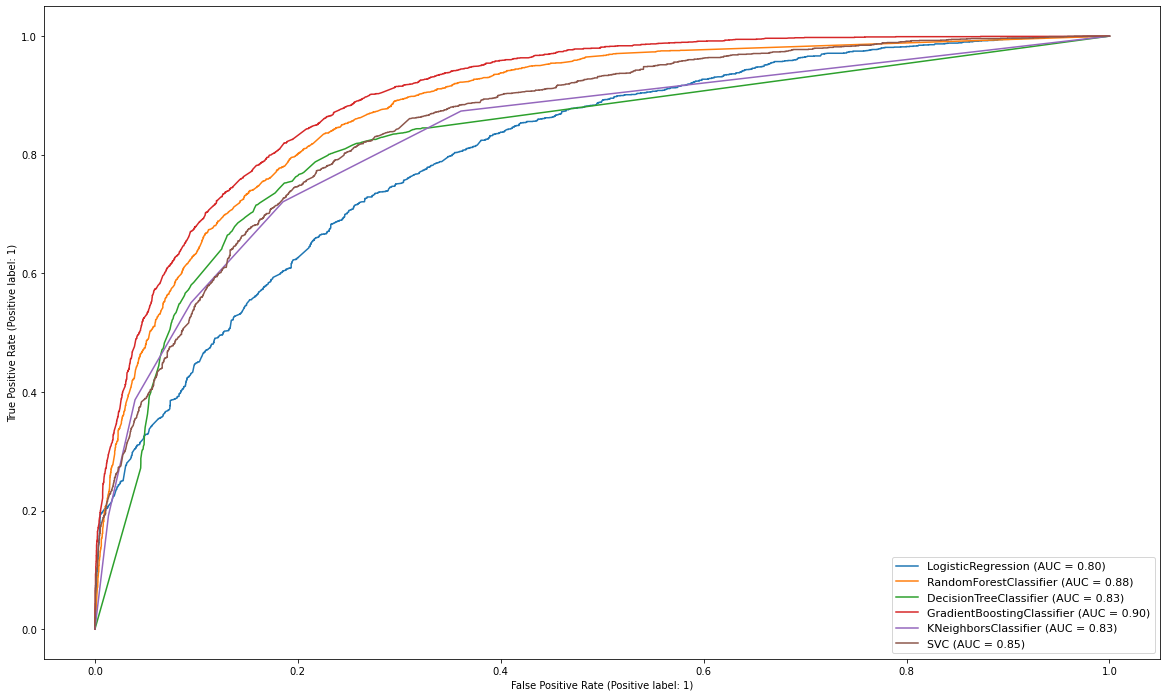

In [140]:
disp = plot_roc_curve(lr,x_test,y_test)
plot_roc_curve(rfc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(dt,x_test,y_test,ax=disp.ax_)
plot_roc_curve(gb,x_test,y_test,ax=disp.ax_)
plot_roc_curve(kn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

### HENCE ,GRADIENT BOOSTING CLASSIFIER IS THE BEST FITTED MODEL AS PER ROC_AUC_SCORE


#### HYPERPARAMETER TUNING IN GRADIENT BOOSTING


In [141]:
from sklearn.model_selection import GridSearchCV
params = {
    'max_depth':(2,3,4,5),
    'n_estimators':(50,100,150,200,250)
}

In [142]:
grid = GridSearchCV(GradientBoostingClassifier()
                    ,param_grid=params,cv=5)
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': (2, 3, 4, 5),
                         'n_estimators': (50, 100, 150, 200, 250)})

In [143]:
# Getting best Parameter
best_param=grid.best_params_
best_param

{'max_depth': 3, 'n_estimators': 200}

In [144]:
# Training tuned data
gb_tuned=GradientBoostingClassifier(n_estimators=200,max_depth=3)
gb_tuned.fit(x_train,y_train)

GradientBoostingClassifier(n_estimators=200)

In [145]:
# getting diff parameter of tuned model
y_pred_gb = gb_tuned.predict(x_test)
acc = accuracy_score(y_test,y_pred)

print('TRAINING SCORE : ', gb_tuned.score(x_train,y_train))
print('TESTING SCORE : ', gb_tuned.score(x_test,y_test))
print('ACCURACY :' , acc)
print('*****************************')
print(classification_report(y_test,y_pred_gb))

TRAINING SCORE :  0.8506302720121316
TESTING SCORE :  0.8514096185737977
ACCURACY : 0.8120508568269762
*****************************
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      6829
           1       0.74      0.61      0.67      2216

    accuracy                           0.85      9045
   macro avg       0.81      0.77      0.79      9045
weighted avg       0.85      0.85      0.85      9045



 0 = Income <=50K
1 = Income > 50K


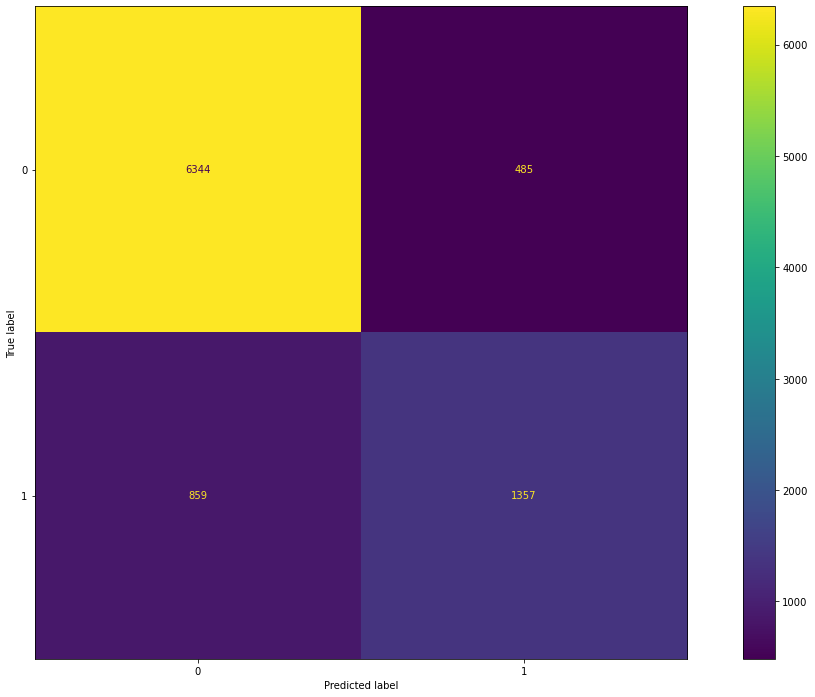

In [146]:
plot_confusion_matrix(gb_tuned,x_test,y_test)
print(' 0 = Income <=50K')
print('1 = Income > 50K')

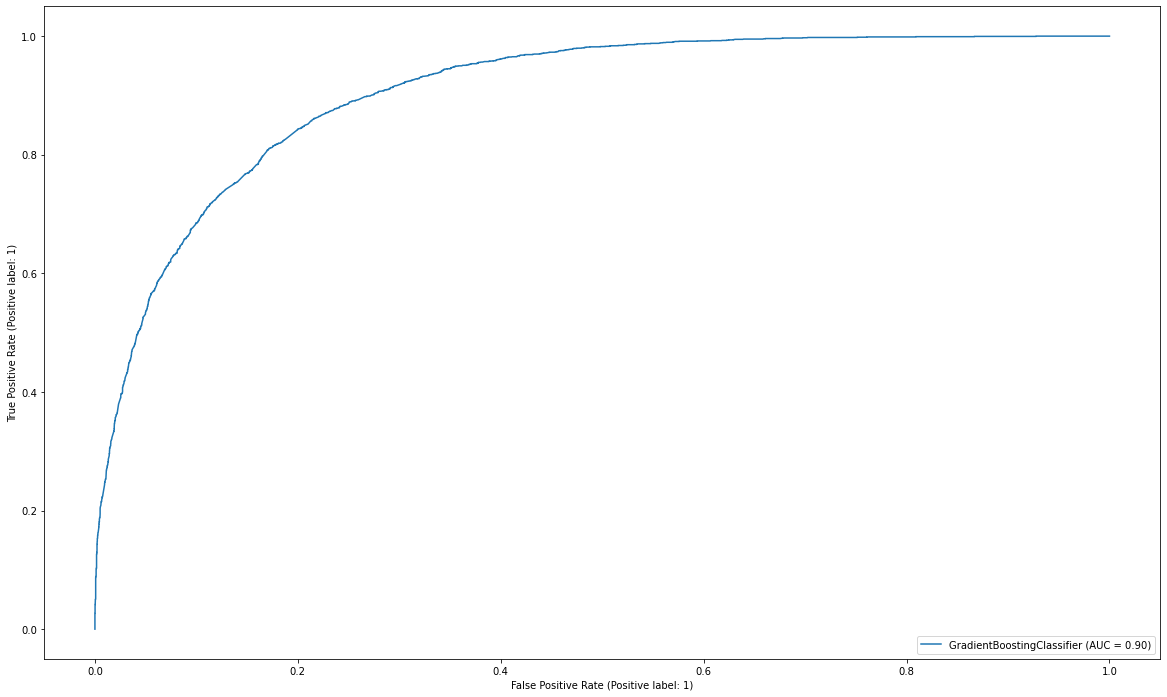

In [147]:
plot_roc_curve(gb_tuned,x_test,y_test)


### EFFICIENCY ACHIEVED

Accuracy achieved on testing, 0.85 i.e 85% 

AUC = 0.90

## Saving Model

In [149]:
import joblib
joblib.dump(gb_tuned,'Census_Income.pkl')

['Census_Income.pkl']

## Conclusion


1) I have learned how to deal with diff kind of data

2) We can divide columns into diffrent category accordingly

3) Studied effect of diffrent column in our target

4) Learn how to find Best Fit Model on basis of diffrent parameter

5) improved the accuracy of model using Hyper Parameter Tuning